In [1]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D, Dropout, AveragePooling2D
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Otherwise plt doesn't work
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

os.environ["CUDA_VISIBLE_DEVICES"] = "1"  # Use GPU 1

In [8]:
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

train_dataset = datagen.flow_from_directory(
    'data/letters/',
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True,
)

val_dataset = datagen.flow_from_directory(
    'data/letters/',
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
)


Found 14984 images belonging to 10 classes.
Found 3740 images belonging to 10 classes.


In [9]:
# Get the first batch of images and labels
images, labels = train_dataset[0]

# Print the classes of the first batch
class_indices = train_dataset.class_indices
print("Class indices:", class_indices)

# Convert one-hot encoded labels back to class names
class_names = list(class_indices.keys())
first_batch_labels = [class_names[tf.argmax(label).numpy()] for label in labels]
print("Classes of the first batch:", first_batch_labels)

print(f"Image shape: {images.shape}")


Class indices: {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9}
Classes of the first batch: ['H', 'D', 'F', 'J', 'J', 'J', 'A', 'B', 'E', 'G', 'F', 'A', 'E', 'D', 'C', 'I', 'D', 'B', 'H', 'D', 'J', 'I', 'D', 'D', 'F', 'I', 'D', 'G', 'C', 'F', 'H', 'F']
Image shape: (32, 28, 28, 1)


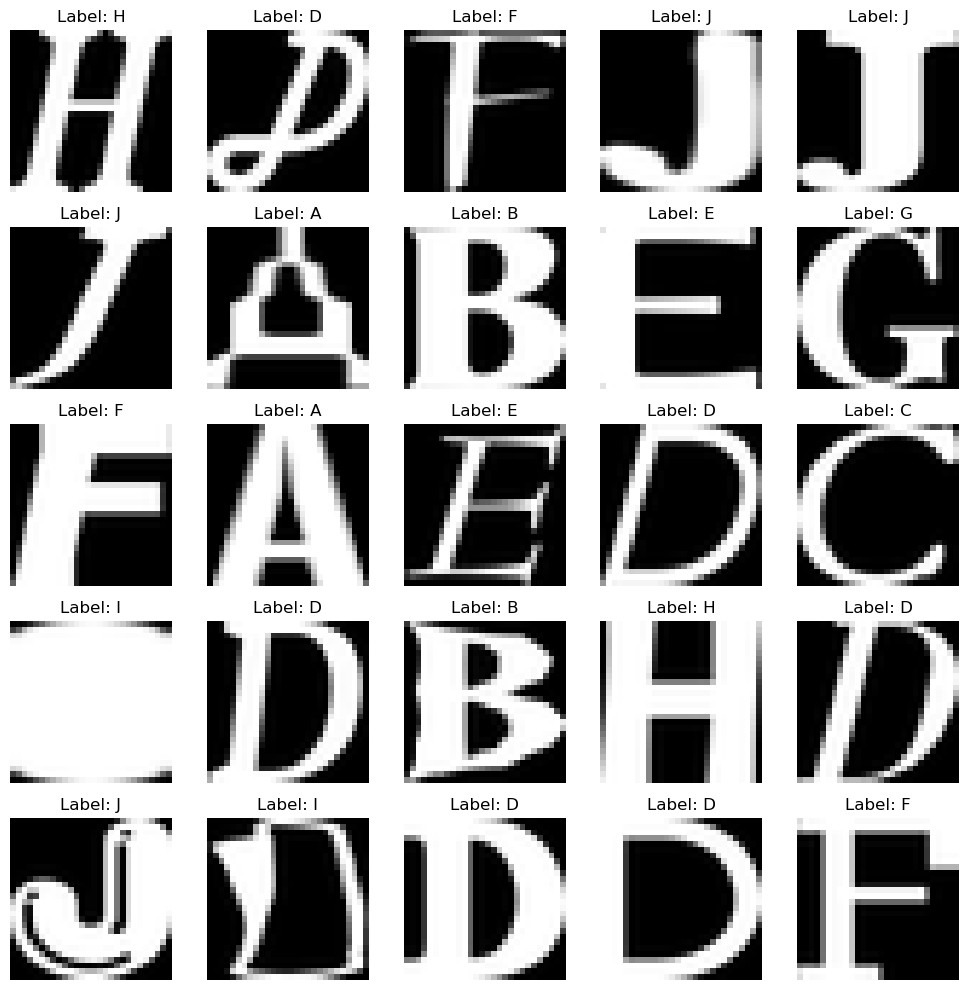

In [10]:

# Display the images in the first batch
plt.figure(figsize=(10, 10))
for i in range(min(25, len(images))):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.title(f"Label: {first_batch_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [11]:
# Task 1
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    Dropout(0.6),
    Conv2D(64, (3, 3), strides=2, padding='same', activation='relu'),
    Dropout(0.6),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(len(class_indices), activation='softmax'),
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 dropout_2 (Dropout)         (None, 28, 28, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                802880    
                                                                 
 dense_3 (Dense)             (None, 10)               

In [13]:
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=val_dataset,
)

Epoch 1/10
469/469 [==============================] - 83s 175ms/step - loss: 0.5268 - accuracy: 0.8515 - val_loss: 0.2767 - val_accuracy: 0.9249
Epoch 2/10
469/469 [==============================] - 20s 43ms/step - loss: 0.3009 - accuracy: 0.9106 - val_loss: 0.2297 - val_accuracy: 0.9348
Epoch 3/10
469/469 [==============================] - 42s 89ms/step - loss: 0.2393 - accuracy: 0.9275 - val_loss: 0.2104 - val_accuracy: 0.9366
Epoch 4/10
469/469 [==============================] - 42s 89ms/step - loss: 0.2078 - accuracy: 0.9343 - val_loss: 0.2050 - val_accuracy: 0.9406
Epoch 5/10
469/469 [==============================] - 42s 89ms/step - loss: 0.1707 - accuracy: 0.9456 - val_loss: 0.2022 - val_accuracy: 0.9414
Epoch 6/10
469/469 [==============================] - 44s 93ms/step - loss: 0.1463 - accuracy: 0.9519 - val_loss: 0.2012 - val_accuracy: 0.9433
Epoch 7/10
469/469 [==============================] - 42s 90ms/step - loss: 0.1268 - accuracy: 0.9581 - val_loss: 0.2158 - val_accuracy

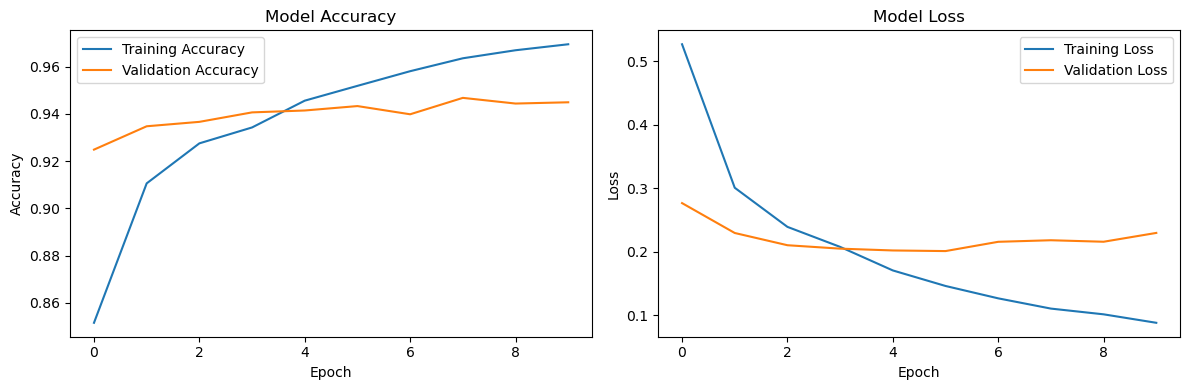

In [14]:
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    
    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

plot_training_history(history)

In [15]:
# Task 2
polling_model = Sequential([
    Input(shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(len(class_indices), activation='softmax'),
])

polling_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [16]:
history = polling_model.fit(
    train_dataset,
    epochs=50,
    validation_data=val_dataset,
)

Epoch 1/50
469/469 [==============================] - 8s 15ms/step - loss: 1.0878 - accuracy: 0.7085 - val_loss: 0.6299 - val_accuracy: 0.8150
Epoch 2/50
469/469 [==============================] - 6s 13ms/step - loss: 0.6120 - accuracy: 0.8353 - val_loss: 0.5279 - val_accuracy: 0.8682
Epoch 3/50
469/469 [==============================] - 6s 12ms/step - loss: 0.5568 - accuracy: 0.8499 - val_loss: 0.4924 - val_accuracy: 0.8634
Epoch 4/50
469/469 [==============================] - 6s 13ms/step - loss: 0.5248 - accuracy: 0.8564 - val_loss: 0.4711 - val_accuracy: 0.8743
Epoch 5/50
469/469 [==============================] - 6s 13ms/step - loss: 0.5042 - accuracy: 0.8611 - val_loss: 0.4538 - val_accuracy: 0.8762
Epoch 6/50
469/469 [==============================] - 6s 12ms/step - loss: 0.4858 - accuracy: 0.8640 - val_loss: 0.4477 - val_accuracy: 0.8818
Epoch 7/50
469/469 [==============================] - 6s 13ms/step - loss: 0.4683 - accuracy: 0.8697 - val_loss: 0.4273 - val_accuracy: 0.8840

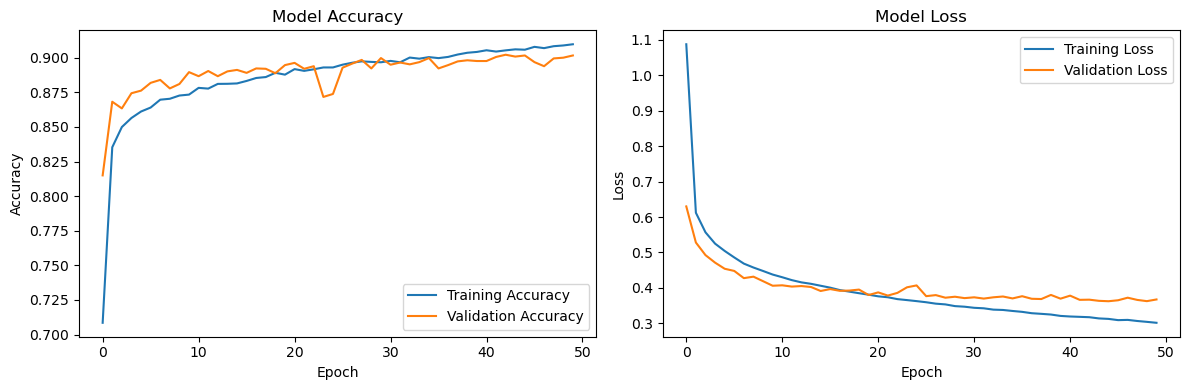

In [17]:
plot_training_history(history)

In [18]:
# Task 3
lenet5_model = Sequential([
    Conv2D(filters=6, strides=(1,1), kernel_size=(5,5), activation='tanh', input_shape=(28, 28, 1)),
    AveragePooling2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(filters=6, strides=(1,1), kernel_size=(5,5), activation='tanh'),
    AveragePooling2D(pool_size=(2,2), strides=(2,2)),
    Dense(units=120, activation='tanh'),
    Flatten(),
    Dense(units=84, activation='tanh'),
    Dense(units=len(class_indices), activation='softmax'),
])

lenet5_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [19]:
history = polling_model.fit(
    train_dataset,
    epochs=10,
    validation_data=val_dataset,
)

Epoch 1/10
469/469 [==============================] - 6s 13ms/step - loss: 0.3019 - accuracy: 0.9096 - val_loss: 0.3598 - val_accuracy: 0.9013
Epoch 2/10
469/469 [==============================] - 6s 12ms/step - loss: 0.2982 - accuracy: 0.9099 - val_loss: 0.3603 - val_accuracy: 0.9021
Epoch 3/10
469/469 [==============================] - 6s 13ms/step - loss: 0.2960 - accuracy: 0.9104 - val_loss: 0.3548 - val_accuracy: 0.9027
Epoch 4/10
469/469 [==============================] - 6s 12ms/step - loss: 0.2942 - accuracy: 0.9130 - val_loss: 0.3708 - val_accuracy: 0.8968
Epoch 5/10
469/469 [==============================] - 6s 13ms/step - loss: 0.2930 - accuracy: 0.9112 - val_loss: 0.3571 - val_accuracy: 0.9003
Epoch 6/10
469/469 [==============================] - 6s 13ms/step - loss: 0.2915 - accuracy: 0.9120 - val_loss: 0.3595 - val_accuracy: 0.9013
Epoch 7/10
469/469 [==============================] - 6s 12ms/step - loss: 0.2893 - accuracy: 0.9119 - val_loss: 0.3546 - val_accuracy: 0.9024

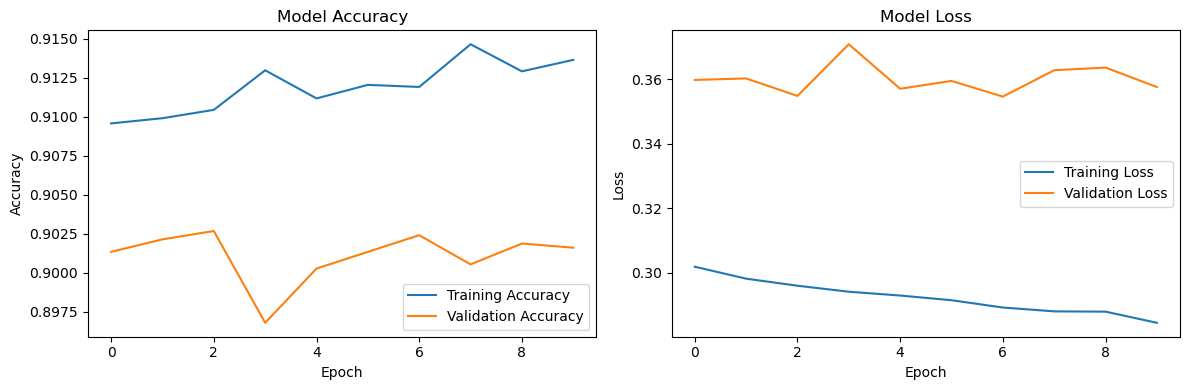

In [20]:
plot_training_history(history)